In [1]:
# coding: utf8
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
%matplotlib inline 

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

/Users/pcf/.env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/pcf/.env/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


YNU.EDU2018-ScenicWord
YNU.EDU2018-ScenicWord_submite_sample.csv
processed



In [2]:
train=pd.read_csv("../input/processed/train_first.csv")
test =pd.read_csv("../input/processed/predict_first.csv")

In [3]:
train.head()

,Unnamed: 0,Id,Discuss,Score,Discuss_processed
0,0,201e8bf2-77a2-3a98-9fcf-4ce03914e712,好大的一个游乐公园，已经去了2次，但感觉还没有玩够似的！会有第三，第四次的,5,好大 的 一个 游乐 公园 ， 已经 去 了 2 次 ， 但 感觉 还 没有 玩 够 似的 ...
1,1,f4d51947-eac4-3005-9d3c-2f32d6068a2d,新中国成立也是在这举行，对我们中国人来说有些重要及深刻的意义！,4,新 中国 成立 也 是 在 这 举行 ， 对 我们 中国 人 来说 有些 重要 及 深刻 的...
2,2,74aa7ae4-03a4-394c-bee0-5702d3a3082a,庐山瀑布非常有名，也有非常多个瀑布，只是最好看的非三叠泉莫属，推荐一去,4,庐山 瀑布 非常 有名 ， 也 有 非常 多 个 瀑布 ， 只是 最 好看 的 非 三 叠 ...
3,3,099661c2-4360-3c49-a2fe-8c783764f7db,个人觉得颐和园是北京最值的一起的地方，不过相比下门票也是最贵的，比起故宫的雄伟与气势磅礴，颐...,5,个人 觉得 颐和园 是 北京 最 值 的 一起 的 地方 ， 不过 相比 下 门票 也 是 ...
4,4,97ca672d-e558-3542-ba7b-ee719bba1bab,迪斯尼一日游,5,迪斯尼 一日游


In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train.Discuss_processed.values)

In [25]:
len(tokenizer.word_index)

89086

In [9]:
train.Discuss_processed.loc[0].split(" ")

['好大',
 '的',
 '一个',
 '游乐',
 '公园',
 '，',
 '已经',
 '去',
 '了',
 '2',
 '次',
 '，',
 '但',
 '感觉',
 '还',
 '没有',
 '玩',
 '够',
 '似的',
 '！',
 '会',
 '有',
 '第三',
 '，',
 '第四',
 '次',
 '的']

In [10]:
seq_ct_len = train.Discuss_processed.apply(lambda x: len(x.split(" ")))
seq_ct_len.describe()

count    100000.000000
mean         32.635830
std          53.186885
min           1.000000
25%           6.000000
50%          16.000000
75%          36.000000
max         981.000000
Name: Discuss_processed, dtype: float64

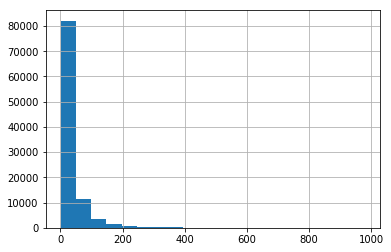

In [14]:
seq_ct_len.hist(bins=20)

In [17]:
xxx=seq_ct_len.sort_values(ascending=False)

In [20]:
xxx[3000:3001].values[0], xxx[4000:4001].values[0], xxx[10000:10001].values[0]    #  97%, 96% 95%

(150, 128, 81)

In [27]:
train.Score.value_counts()

5    60097
4    28954
3     9389
2      973
1      587
Name: Score, dtype: int64